# **THE SPARKS FOUNDATION INTERNSHIP (GRIP FEB 2021)**
# **Author:** Jatin Ahuja
# **Task 1:** Prediction using Supervised ML
## **Problem Statement:** Predict the percentage of an student based on the no. of study hours.

# **1.1 Importing Libraries**

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split  

In [60]:
import warnings
warnings.filterwarnings('ignore')

## **1.2 Reading The Data And Data Preprocessing**

In [61]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [63]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [64]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## **1.3 Data Visualization**

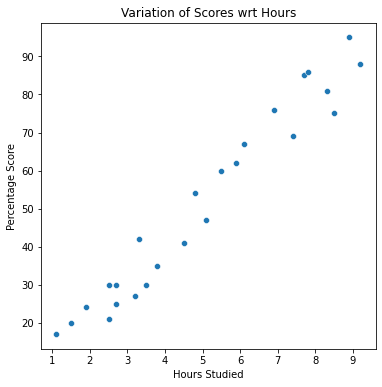

In [65]:
plt.figure(figsize=(6,6))
sns.scatterplot(df['Hours'],df['Scores'])
plt.title('Variation of Scores wrt Hours')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show();

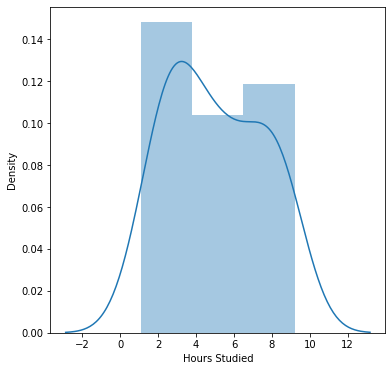

In [66]:
plt.figure(figsize=(6,6))
sns.distplot(df['Hours'])
plt.xlabel("Hours Studied")
plt.show();

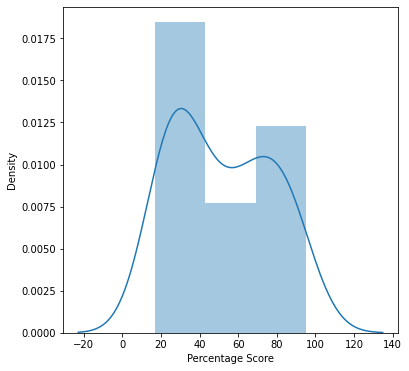

In [67]:
plt.figure(figsize = (6,6))
sns.distplot(df['Scores'])
plt.xlabel("Percentage Score")
plt.show();

## **1.4 Preparing The Data**

In [68]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [69]:
# splitting the data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 

## **1.5 Preparing The Model**

In [70]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print("Accuracy on Training Dataset {:.3f}".format(reg.score(x_train,y_train)))
print("Accuracy on Test Dataset {:.3f}".format(reg.score(x_test,y_test)))

Accuracy on Training Dataset 0.952
Accuracy on Test Dataset 0.945


In [72]:
line = reg.coef_*x + reg.intercept_

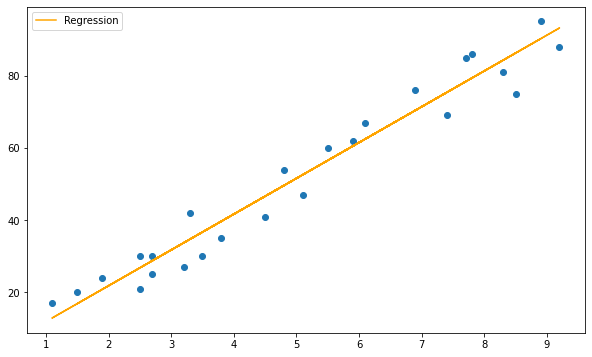

In [73]:
plt.figure(figsize = (10,6))
plt.scatter(x,y)
plt.plot(x, line, color = 'orange', label = 'Regression')
plt.legend()
plt.show();

## **1.6 Making Predictions**

In [74]:
y_pred = reg.predict(x_test)
y_pred 

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [75]:
mean_squared_error(y_pred, y_test) 

21.598769307217456

In [76]:
r2_score(y_test, y_pred)

0.9454906892105354

In [77]:
data = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
data

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [78]:
# finding the predicted score if student studies for 9.25 hours per day
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
new_prediction = reg.predict(test)
print("number of hours: {}".format(hours))
print("predicted score: {}".format(new_prediction[0]))

number of hours: 9.25
predicted score: 93.69173248737539
